In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sciI
import scipy as sci
import scipy.ndimage
import scipy.stats
import math

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [61]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return 1
    
first_prior = np.vectorize(uniform_prior)
    

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    
    sigma = 0.03
    mu = 0.5
    y= np.exp(-np.power(H - mu, 2.) / (2 * np.power(sigma, 2.)))
    
    return y

second_prior =  np.vectorize(gaussian_prior)


def third_prior(H):
    return((H-0.5)**20)
   
third_prior = np.vectorize(np.vectorize(third_prior))

    


### Bonus point

Why do we need to use np.vectorize here?

In [ ]:
it acts like forloop but it is more efficient

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [47]:
H = np.linspace(0, 1, 1000, dtype=np.float32)

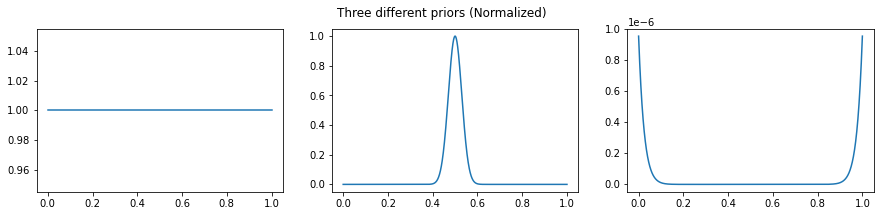

In [82]:
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')
priors= [first_prior(H),second_prior(H),third_prior(H)]
for i in range(len(priors)):
    plt.subplot(1,3,i+1)
    plt.plot(H,priors[i])
plt.show()

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.


answer:
 the floating point numbers can not be stored with perfect precision, instead the numbers are approximated by finite number of bytes. Therefore, the difference between an approximation of a number used in computation and its correct (true) value is called round-off error. It is one of the common errors usually in the numerical calculation.

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [83]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])

In [119]:
def posterior(H, data,k):
   
    ones = np.count_nonzero(data == 1)
    zeros = np.count_nonzero(data == 0)
    a=np.power(H,ones) * np.power((1-H),zeros)
    if k==1:
        return (first_prior(H)*((H)**ones)*((1-H)**zeros))/max(first_prior(H) * H**ones * (1-H)**zeros)
    if k==2:
        return (second_prior(H)*((H)**ones)*((1-H)**zeros))/max(second_prior(H) * H**ones * (1-H)**zeros)
    if k==3:
        return (third_prior(H)*((H)**ones)*((1-H)**zeros))/max(third_prior(H) * H**ones * (1-H)**zeros)

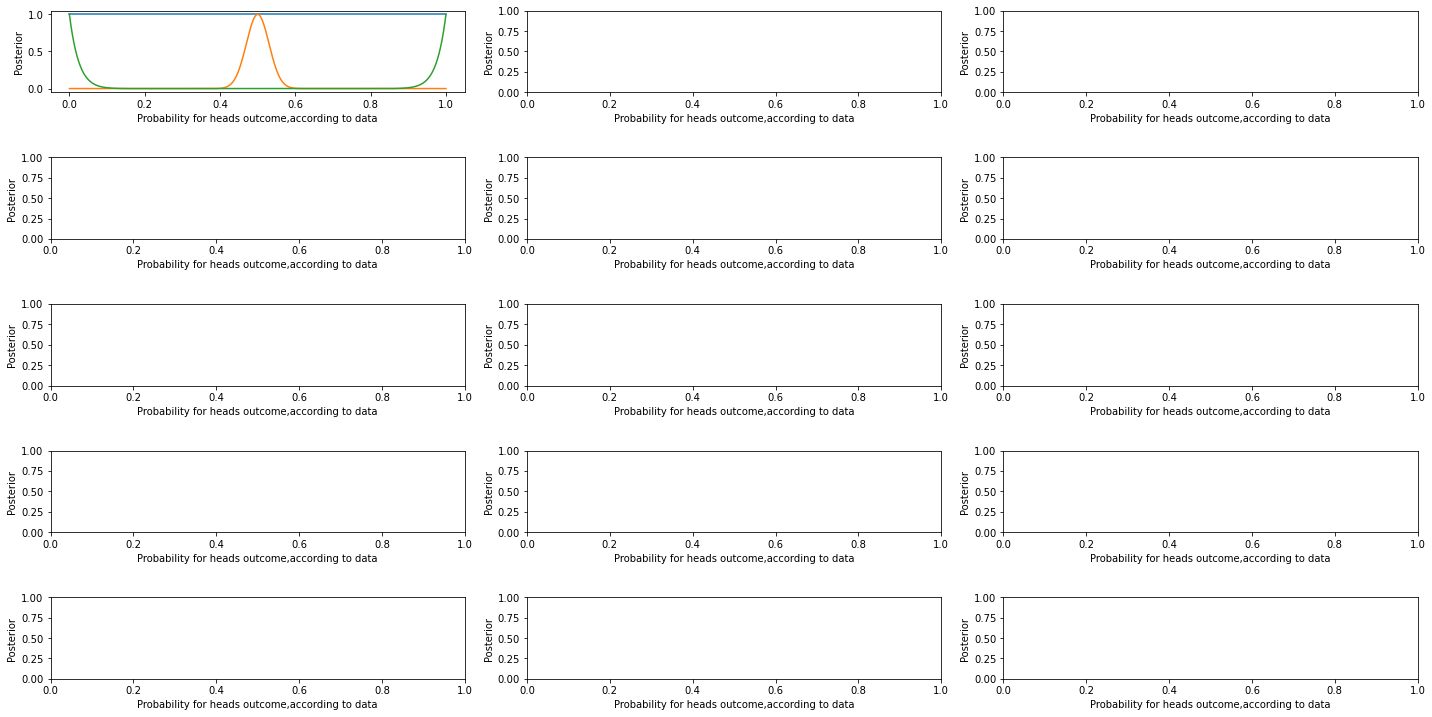

In [128]:
plt.figure(figsize=(20, 30))
for i in range(15):
    k==1
    plt.subplot(15,3,i+1)
    plt.xlabel("Probability for heads outcome,according to data")
    plt.ylabel("Posterior")
    while k<=3:
        plt.plot(H,posterior(H,data,k))
        k=k+1
    
    
plt.tight_layout(h_pad=3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [63]:
#n=number of moment
def rawMoment(array, n):
    return (np.sum((array)**n))/(array.size)

## (b)

Write a function to calculate central moments of a given distribution

In [64]:
#n=number of central moment
def centralMoment(array, n):
    return (np.sum((array-np.mean(array))**n))/(array.size)

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [73]:
binomial = np.random.binomial(30, 0.7, size=1000000)
def printMoments(array):
    print("First Raw Moment:", rawMoment(array, 1))
    print("Second Raw Moment:", rawMoment(array, 2))
    print("Third Raw Moment:", rawMoment(array, 3))
    print("First Central Moment:", centralMoment(array, 1))
    print("Second Central Moment:", centralMoment(array, 2))
    print("Third Central Moment:", centralMoment(array, 3))
printMoments(binomial)

First Raw Moment: 20.997487
Second Raw Moment: 447.188857
Third Raw Moment: 1061.719001
First Central Moment: 4.3155523599125444e-16
Second Central Moment: 6.294396684830998
Third Central Moment: -2.5216435275230302


In [71]:
poisson = np.random.poisson(2.1, size=1000000)
printMoments(poisson)

First Raw Moment: 2.09954
Second Raw Moment: 6.508014
Third Raw Moment: 24.588452
First Central Moment: -2.1680079953512178e-16
Second Central Moment: 2.0999457884
Third Central Moment: 2.1067759252853264


In [70]:
gaussian = np.random.normal(2.1, 0.3, size=1000000)
printMoments(gaussian)

First Raw Moment: 2.100524447295009
Second Raw Moment: 4.502099968272107
Third Raw Moment: 9.834409551700404
First Central Moment: -9.494671715515324e-16
Second Central Moment: 0.08989701458810918
Third Central Moment: -2.3249583555634876e-05


## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [105]:
import scipy as sp
from scipy import stats

In [111]:
def printScipyMoments(array):
    print("First Moment:", sp.stats.moment(array, 1))
    print("Second Moment:", sp.stats.moment(array, 2))
    print("Third Moment:", sp.stats.moment(array, 3))
print("binomial")
printScipyMoments(binomial)
print("gaussian")
printScipyMoments(gaussian)
print("poisson")
printScipyMoments(poisson)

binomial
First Moment: 0.0
Second Moment: 6.294396684830998
Third Moment: -2.5216435275230302
gaussian
First Moment: 0.0
Second Moment: 0.08989701458810918
Third Moment: -2.3249583555634926e-05
poisson
First Moment: 0.0
Second Moment: 2.0999457884
Third Moment: 2.106775925285327


# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [116]:
from pandas import DataFrame, read_csv

In [117]:
data = np.loadtxt("data.txt")
Frame = DataFrame(data, columns = ["time passed","number of events"])
Frame

,time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0
...,...,...
2043,15330.0,265.0
2044,15337.5,220.0
2045,15345.0,252.0
2046,15352.5,229.0


## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

In [118]:
total = Frame['number of events'].sum()
print('Total number of decays:', total)
mean = Frame['number of events'].mean()
print('Average number of decays:', mean)

newFrame = Frame.append(DataFrame({"Total # of decays":[str(total)],"Average # of decays":[str(mean)]}))
newFrame

np.savetxt(r'new_data.txt', newFrame.values, fmt='%s')

Total number of decays: 485193.0
Average number of decays: 236.91064453125


## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.